### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
# from src.evaluation.evaluator_manager import EvaluatorManager
# from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer

from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

In [4]:
config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc'
# config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_RSGG.jsonc'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc
2024-07-25 14:50:01,-370084295 | INFO | 779572 - Executing: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc Run: 1
2024-07-25 14:50:01,-370084284 | INFO | 779572 - Creating the evaluation manager....................................
2024-07-25 14:50:01,-370084274 | INFO | 779572 - Creating the evaluators......................................................
2024-07-25 14:50:01,-370084166 | INFO | 779572 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-07-25 14:50:01,-370084055 | INFO | 779572 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-07-25 14:50:01,-370084003 | INFO | 779572 - Creating: TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2
2024-07-25 14:50:01,-370083992 | INFO | 779572 - TreeCyclesOracle trained in: 9.

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Instability,Instability-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ExplanationBidirectionalSearch,4.657705,4.08938,1.201925,0.009012,0.996094,0.003906,754.4375,148.648438,1.0,0.0,0.028635,0.000224,0.996094,0.003906,1.019278,0.001071


### Visualizing individual instances

In [8]:
evaluator = eval_manager.evaluators[0]
evaluator

In [9]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

In [10]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [11]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(4, 10)]
removed_edges: []
added nodes: []
removed nodes: []


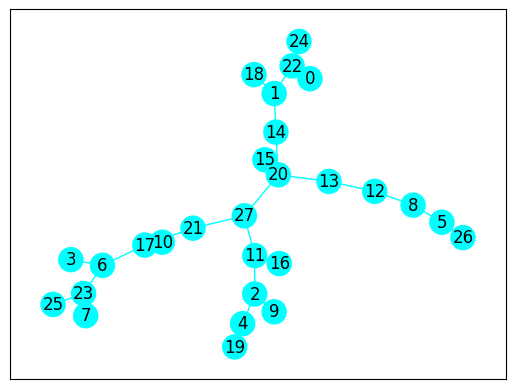

In [14]:
pos = data_analyzer.draw_graph(og_inst)

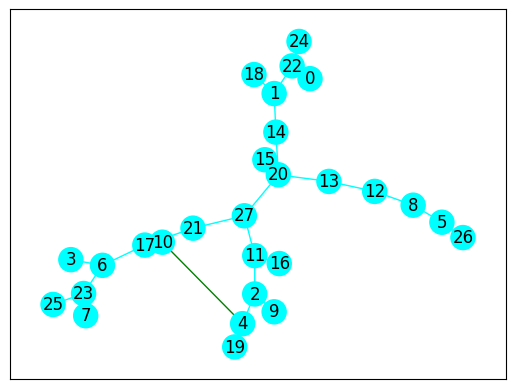

In [15]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)